In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import string

In [33]:
!pip install nltk

In [34]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
df.shape

(5572, 5)

## Data Cleaning

In [36]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [37]:
#drop the columns that are not needed
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [38]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
#replace column titles with meaningful titles
df.rename(columns={'v1': 'labels', 'v2': 'message'}, inplace=True)

In [40]:
df.sample(5)

,labels,message
2290,ham,"HEY THERE BABE, HOW U DOIN? WOT U UP 2 2NITE L..."
164,spam,BangBabes Ur order is on the way. U SHOULD rec...
1700,ham,Please ask mummy to call father
5405,ham,So how many days since then?
4943,ham,Wrong phone! This phone! I answer this one but...


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
df.labels = le.fit_transform(df['labels'])

In [43]:
df.sample(5)

,labels,message
4423,0,Update your face book status frequently :)
1199,0,NEFT Transaction with reference number &lt;#&...
4314,0,Captain is in our room:)
5455,0,Wishing you a beautiful day. Each moment revea...
967,0,What do u want when i come back?.a beautiful n...


In [44]:
df.isnull().sum()

labels     0
message    0
dtype: int64

In [45]:
print("Number of duplicates: ", df.duplicated().sum())
df.drop_duplicates(keep='first',inplace=True)
print("Number of duplicates after dropped: ",df.duplicated().sum())
print("Shape: ", df.shape)

Number of duplicates:  403
Number of duplicates after dropped:  0
Shape:  (5169, 2)


## 2. EDA

In [46]:
df.labels.value_counts()

0    4516
1     653
Name: labels, dtype: int64

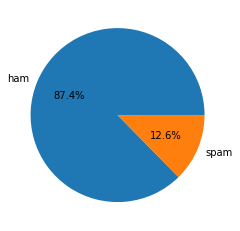

In [47]:
plt.pie(df.labels.value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Lets analyze number of characters, number of words and number of sentences in each message

In [49]:
#number of characters in each message
df['no_of_char'] = df['message'].apply(len)

In [50]:
df.head()

,labels,message,no_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [51]:
#number of words in each message
df['no_of_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [52]:
df.head()

,labels,message,no_of_char,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [53]:
#number of sentences in each message
df['no_of_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [54]:
df.describe()

,labels,no_of_char,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


This shows each record has atleast a word and two characters. 

In [55]:
#spam
df[df.labels == 1].describe()

,labels,no_of_char,no_of_words,no_of_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.474732,2.969372
std,0.0,30.137753,6.893007,1.488910
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,44.000000,9.000000


In [56]:
#ham
df[df.labels == 0].describe()

,labels,no_of_char,no_of_words,no_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,16.957484,1.815545
std,0.0,56.358207,13.394052,1.364098
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,219.000000,38.000000


This shows that there more number of characters, words, sentences in each spam message than in the ham message.

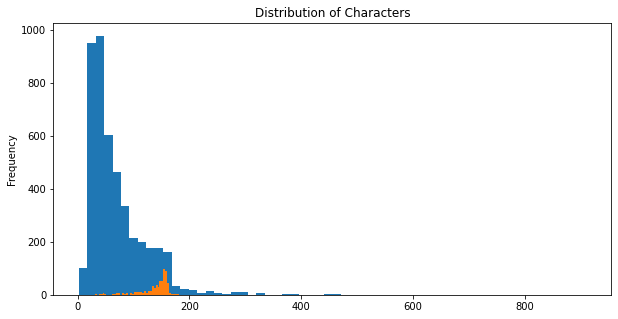

In [57]:
#Lets visualize the distribution of characters in histogram
plt.figure(figsize=(10,5))
df[df.labels == 0]['no_of_char'].plot(kind='hist', bins=60)
df[df.labels == 1]['no_of_char'].plot(kind='hist', bins=60)
plt.title('Distribution of Characters')
plt.show()

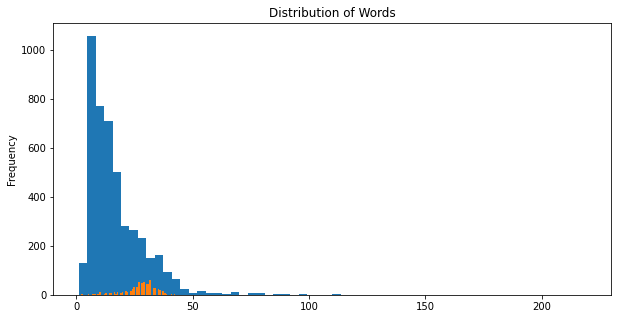

In [58]:
#Lets visualize the distribution of words in histogram
plt.figure(figsize=(10,5))
df[df.labels == 0]['no_of_words'].plot(kind='hist', bins=60)
df[df.labels == 1]['no_of_words'].plot(kind='hist', bins=60)
plt.title('Distribution of Words')
plt.show()

In [59]:
df.head()

,labels,message,no_of_char,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


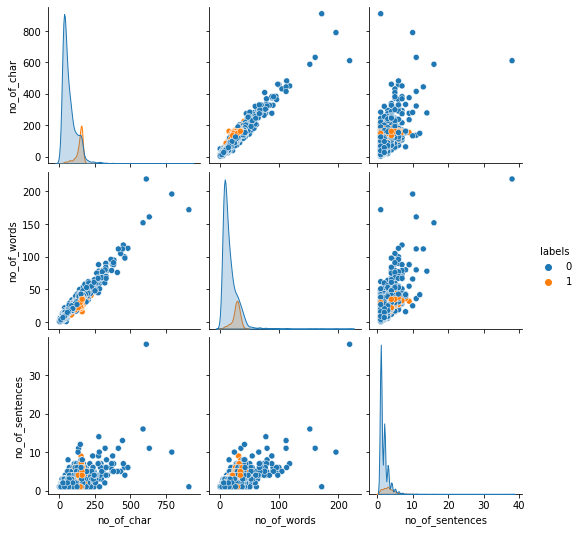

In [60]:
sns.pairplot(df, hue='labels')
plt.show()

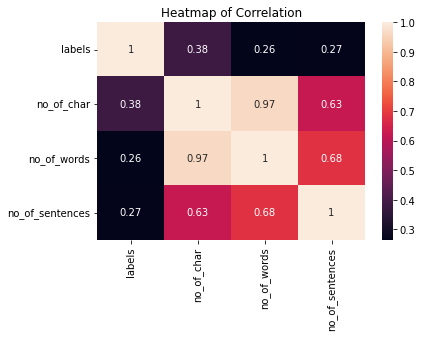

In [61]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap of Correlation')
plt.show()

## Data Preprocessing
* Lower case
* Tokenization
* Special characters removal
* Stop words and punctuation removal
* Stemming

In [66]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [67]:
from nltk.stem import PorterStemmer
pc = PorterStemmer()

In [68]:
from nltk.corpus import stopwords

In [69]:
def transform_text(text):
    #lower case
    text = text.lower()
    #tokenize
    text = nltk.word_tokenize(text)
    #special characters removal
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    #stop words removal
    text = y[:]
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #stemming
    text = y[:]
    y = []   
    for i in text:
        y.append(pc.stem(i))       
    #returning the list as a string
    return " ".join(y)    

In [70]:
transform_text('The quick brown fox jumps over the lazy dog.')

'quick brown fox jump lazi dog'

In [74]:
df['transformed_text'] = df.message.apply(transform_text)

In [72]:
!pip install wordcloud

In [73]:
from wordcloud import WordCloud


In [84]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')


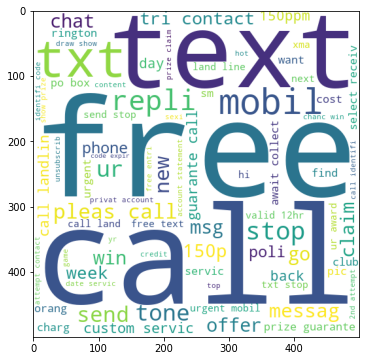

In [87]:
#word cloud for spam messages
plt.figure(figsize=(12,6))
spam_wc = wc.generate(df[df.labels==1].transformed_text.str.cat(sep=' '))
plt.imshow(spam_wc)

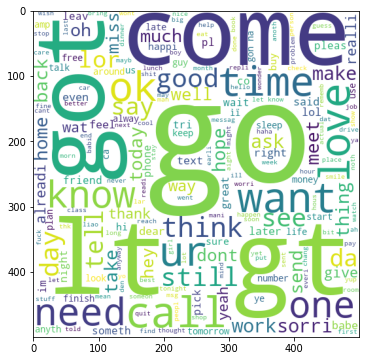

In [88]:
#word cloud for ham messages
plt.figure(figsize=(12,6))
ham_wc = wc.generate(df[df.labels==0].transformed_text.str.cat(sep=' '))
plt.imshow(ham_wc)

Lets take top 30 words from each label

In [95]:
from collections import Counter

In [92]:
ham_corpus = []
for msg in df[df.labels==0].transformed_text.tolist():
  for word in msg.split(' '):
    ham_corpus.append(word)


In [94]:
#Length of all the ham words
len(ham_corpus)

34784

In [101]:
import warnings
warnings.filterwarnings("ignore")

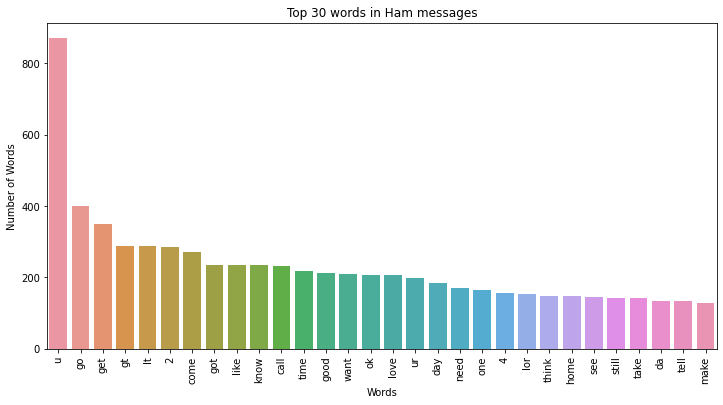

In [105]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xlabel("Words")
plt.ylabel("Number of Words")
plt.title("Top 30 words in Ham messages")
plt.xticks(rotation='vertical')
plt.show()

In [108]:
spam_corpus = []
for msg in df[df.labels==1].transformed_text.tolist():
  for word in msg.split(' '):
    spam_corpus.append(word)

In [109]:
len(spam_corpus)

9883

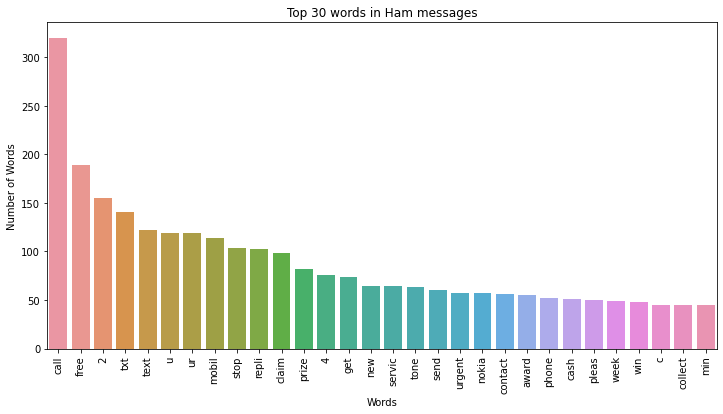

In [110]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xlabel("Words")
plt.ylabel("Number of Words")
plt.title("Top 30 words in Ham messages")
plt.xticks(rotation='vertical')
plt.show()

## 4. Buliding a model

In [111]:
df.shape

(5169, 6)

In [112]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=7000)
tfidf = TfidfVectorizer()

In [113]:
X = cv.fit_transform(df.transformed_text).toarray()
y = df.labels

In [114]:
X.shape

(5169, 6629)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [116]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [118]:
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print(accuracy_score(y_test, gnb_pred))
print(confusion_matrix(y_test, gnb_pred))

0.8713733075435203
[[769 116]
 [ 17 132]]


In [119]:
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
print(accuracy_score(y_test, mnb_pred))
print(confusion_matrix(y_test, mnb_pred))

0.9700193423597679
[[871  14]
 [ 17 132]]


In [120]:
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
print(accuracy_score(y_test, bnb_pred))
print(confusion_matrix(y_test, bnb_pred))

0.9671179883945842
[[881   4]
 [ 30 119]]


**with tfidf**

In [121]:
X = tfidf.fit_transform(df.transformed_text).toarray()
y = df.labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [122]:
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print(accuracy_score(y_test, gnb_pred))
print(confusion_matrix(y_test, gnb_pred))

0.867504835589942
[[769 116]
 [ 21 128]]


In [123]:
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
print(accuracy_score(y_test, mnb_pred))
print(confusion_matrix(y_test, mnb_pred))

0.9458413926499033
[[885   0]
 [ 56  93]]


In [124]:
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
print(accuracy_score(y_test, bnb_pred))
print(confusion_matrix(y_test, bnb_pred))

0.9671179883945842
[[881   4]
 [ 30 119]]


In [125]:
import pickle

In [127]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model_mnb.pkl', 'wb'))